In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print("Train images shape:",train_images.shape)
print("Test images shape:",train_labels.shape)

Train images shape: (60000, 28, 28)
Test images shape: (60000,)


In [6]:
print("Train images shape:",test_images.shape)
print("Test images shape:",test_labels.shape)

Train images shape: (10000, 28, 28)
Test images shape: (10000,)


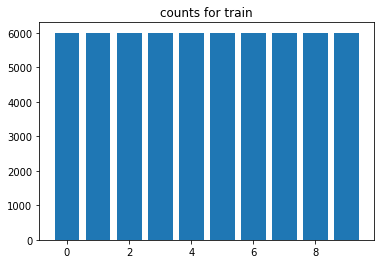

In [7]:
classes, counts = np.unique(train_labels, return_counts=1)
plt.bar(classes,counts)
plt.title("counts for train");

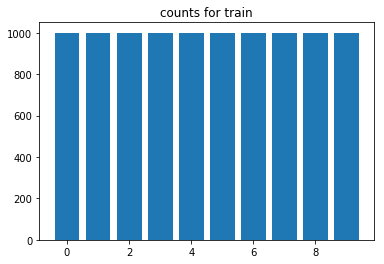

In [8]:
classes, counts = np.unique(test_labels, return_counts=1)
plt.bar(classes,counts)
plt.title("counts for train");

In [9]:
# simple function for plot random images
def plot_images(X,y,size=10):
    for i in range(size):
        idx = np.random.randint(low = 0, high = X.shape[0],size = 1)
        img = X[idx]
        label = class_names[y[idx][0]]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.title(label)
        plt.show()
        

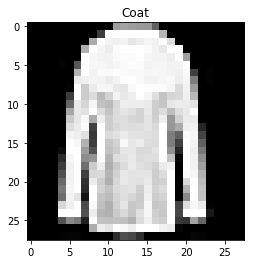

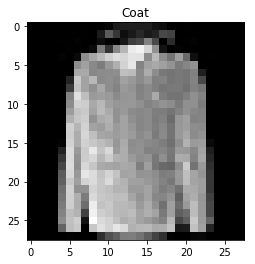

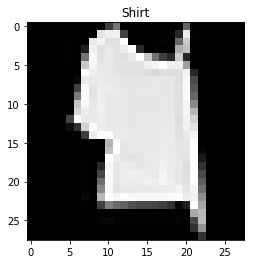

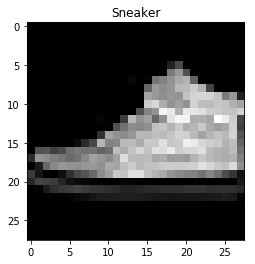

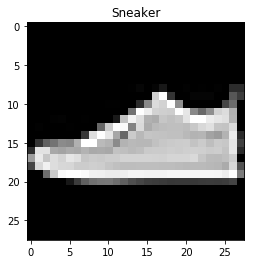

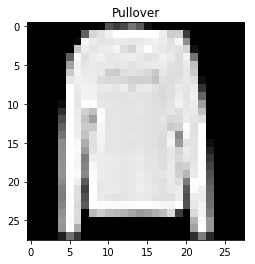

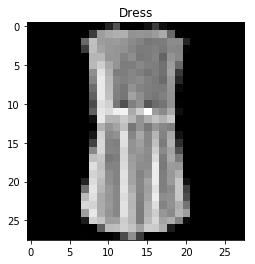

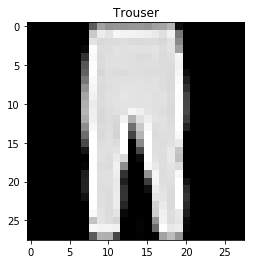

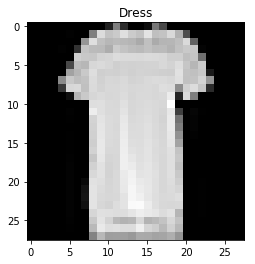

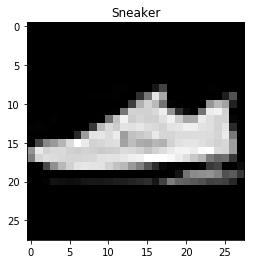

In [10]:
plot_images(train_images,train_labels)

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W0712 23:47:11.241635 140589301208896 deprecation.py:506] From /root/environments/my_env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, validation_split = 0.33, epochs=10)



Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 2s 51us/sample - loss: 0.5324 - acc: 0.8164 - val_loss: 0.4293 - val_acc: 0.8490
Epoch 2/10
40199/40199 [==============================] - 2s 48us/sample - loss: 0.4017 - acc: 0.8583 - val_loss: 0.3730 - val_acc: 0.8668
Epoch 3/10
40199/40199 [==============================] - 2s 47us/sample - loss: 0.3600 - acc: 0.8697 - val_loss: 0.3545 - val_acc: 0.8719
Epoch 4/10
40199/40199 [==============================] - 2s 46us/sample - loss: 0.3291 - acc: 0.8809 - val_loss: 0.3455 - val_acc: 0.8763
Epoch 5/10
40199/40199 [==============================] - 2s 48us/sample - loss: 0.3097 - acc: 0.8840 - val_loss: 0.3539 - val_acc: 0.8701
Epoch 6/10
40199/40199 [==============================] - 2s 47us/sample - loss: 0.2921 - acc: 0.8918 - val_loss: 0.3450 - val_acc: 0.8722
Epoch 7/10
40199/40199 [==============================] - 2s 44us/sample - loss: 0.2790 - acc: 0.8970 - val_loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


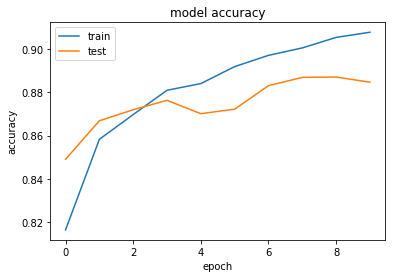

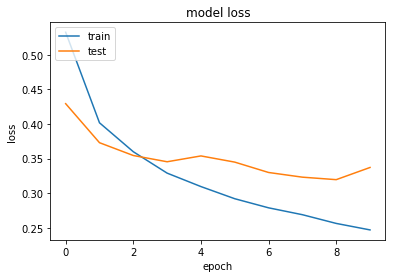

In [15]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n Accuracy in test dataset:', test_acc)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.3744 - acc: 0.8730

 Accuracy in test dataset: 0.873
